  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>DIABETES  PREDICTION 
                    </b>
                </font>
            </div>
        </td>
    </tr>

**Contents**

1. **[Import Packages](#import_packages)**

2. **[Read Data](#Read_Data)**

3. **[Data Analysis and Preparation](#data_preparation)**
    - 3.1 - **[Understand the Dataset](#Data_Understanding)**
        - 3.1.1 - **[Data Type](#Data_Types)**
        - 3.1.2 - **[Summary Statistics](#Summary_Statistics)**
        - 3.1.3 - **[Distribution of Variables](#distribution_variables)**
        - 3.1.4 - **[Correlation](#correlation)**
        - 3.1.5 - **[Discover Outliers](#outliers)**
        - 3.1.6 - **[Missing Values](#Missing_Values)**
        - 3.1.7 - **[Duplicate Values](#Duplicate_Values)**    
    - 3.2 - **[Visualization](#Visualization)**
    - 3.3 - **[Balancing of Data](#feature_selection)**
    
4. **[Feature Selection](#feature_selection)**
    - 4.1 - **[KNN](#KNN)**
    - 4.2 - **[KNN(GRID)](#KNN(GRID))**
    - 4.3 - **[Random Forest Classifier](#Random_Forest_Classifier)** 
    - 4.4 - **[Bagging meta-estimator(RF)](#Bagging(RF))**

5. **[Model Comparision](#model_cmp)** 

6. **[Pickle File](#pickle)**


<a id='import_packages'></a>
## **1. Import Packages**

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set default setting of seaborn
sns.set()

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import numpy


# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib.colors import ListedColormap
# import various functions to perform classification
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

import pickle

<a id='Read_Data'></a>
## **2. Read the Data**

In [156]:
raw_data=pd.read_csv(r'C:\Users\BR\Desktop\final project\dataset.csv')

In [157]:

# read the data
#raw_data = pd.read_csv('Diabetes(800) Dataset.csv')

# print the first five rows of the data
raw_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
# shape of the data frame 

raw_data.shape

(768, 9)

<a id='data_preparation'></a>
## **3. Data Analysis and Preparation**

Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        2. If data types are not as per business definition, change the data types as per requirement <br>
                        3. Study summary statistics<br>
                        4. Distribution of variables<br>
                        5. Study correlation<br>
                        6. Detect outliers<br>
                        7. Check for missing values<br><br>
                        Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area
                    

<a id='Data_Understanding'></a>
## **3.1 Understand the Dataset**

<a id='Data_Types'></a>
## **3.1.1 Data Type**

The main data types in Pandas dataframes are the object, float and int64. To understand each attribute of our data, it is always good for us to know the data type of each column.

In our dataset, we have numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.<br><br> 
                        1. Check for the data type <br>
                        2. For any incorrect data type, change the data type with the appropriate type<br>
                        3. Recheck for the data type
                   

**1. Check for the data type**

In [159]:
# 'dtypes' gives the data type for each column
raw_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

From the above output, it is clear to see that the data type of variables 'Blurry vision', 'Weight loss', 'Numbness', 'Urinating often','Thirsty','District','Gender'and Outcome are categorical variables, 'BMI' and DiabetesPedigreeFunction is a float64 and the remaining are all int64.
                

For convenience, we shall split the target variable from the data frame.
Let dataframe 'df_target' be the dataframe containing the dependent variable, dataframe 'df_features' be the set of all independent variables and dataframe 'district' be the dataframe containing the categorical data.

In [160]:
# splitting features, the target and the categorical variable
# consider all the columns except 'target' using 'iloc'
# here id is not required for analysis

df_features = raw_data.iloc[:, raw_data.columns != 'Outcome']

# consider the target variable
df_target = raw_data.iloc[:,raw_data.columns == 'Outcome']

Use the dataframe containing features (df_features) for further analysis.

<a id='Summary_Statistics'></a>
## **3.1.2 Summary Statistics**

**Use the describe()**

In [161]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
#We transpose the results for better readability


df_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


<a id='distribution_variables'></a>
## **3.1.3 Distribution of Variables**

Check the distribution of all the variables <br><br>
                        1. Distribution of numeric independent variables<br>
                        2. Distribution of categoric independent variables<br>
                        3. Distribution of dependent variable
                   

#### 1. Distribution of numeric independent variables.

For the independent numeric variables, we plot the histogram to check the distribution of the variables.

In [162]:
df_features.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Pregnancies


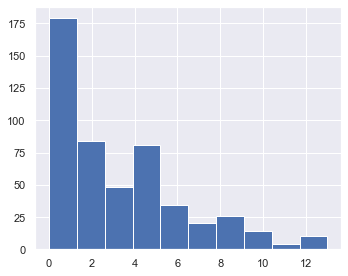

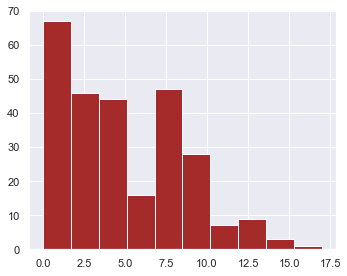

Glucose


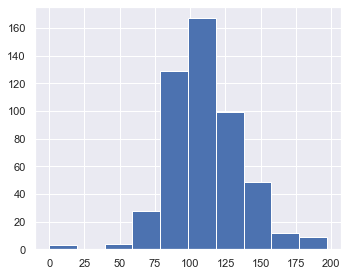

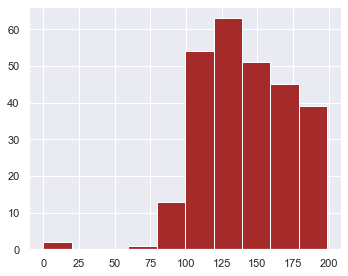

BloodPressure


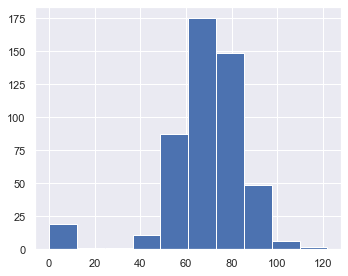

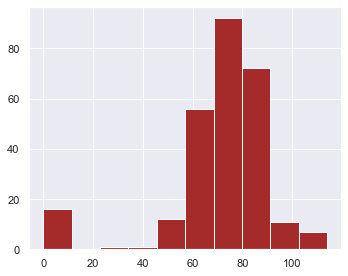

SkinThickness


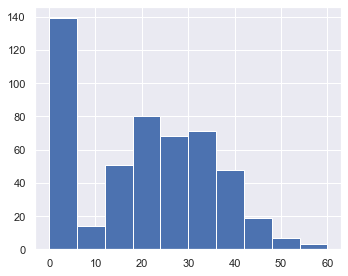

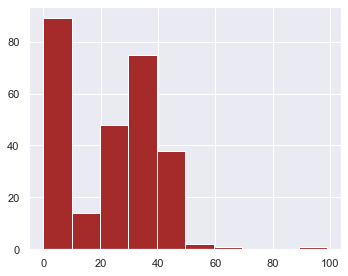

Insulin


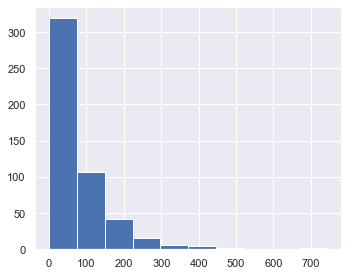

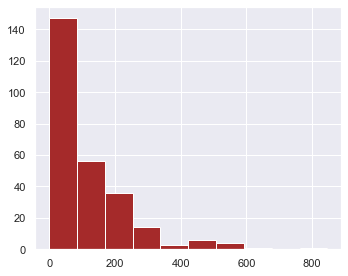

BMI


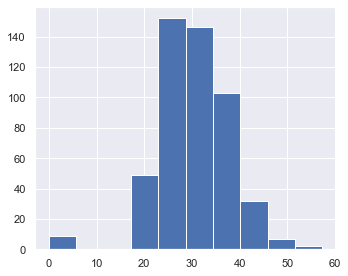

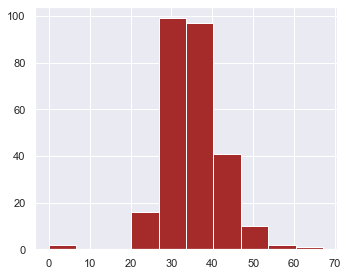

DiabetesPedigreeFunction


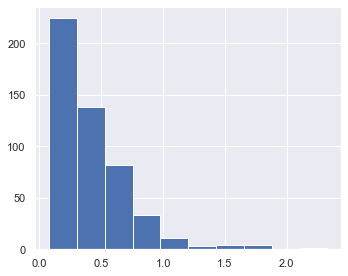

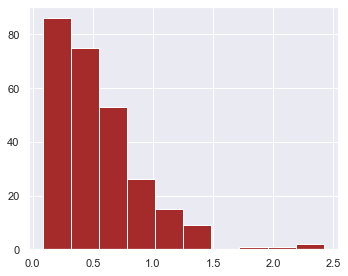

Age


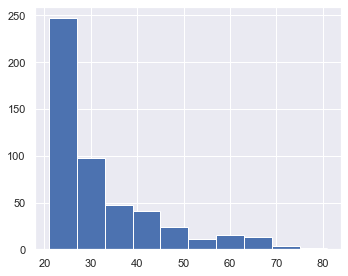

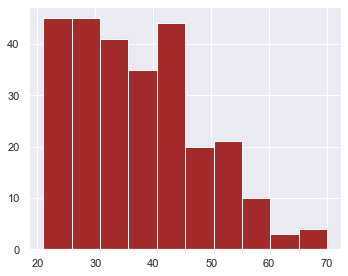

In [163]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default

col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
l1=[]
l2=[]
for i in col:
  for j in range(0,768):
    if df_target.Outcome[j]==0:
      l1.append(df_features[i][j])
    else:
      l2.append(df_features[i][j])
  plt.figure(figsize=(5,4))
  print(i)
  plt.hist(l1)
  plt.tight_layout()
  plt.show()
  plt.figure(figsize=(5,4))
  plt.hist(l2,color='Brown')
  plt.tight_layout()
  plt.show()  
  l1=[]
  l2=[]
 


#### 2. Distribution of categoric independent variables.

For the independent categoric variables, we plot the bar plot to check the distribution of each variables.

In [164]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df_features:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_features[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)
print("Categorical datas :",categorical)

col=categorical
l1=[]
l2=[]
for i in col:
  for j in range(0,768):
    if df_target.Outcome[j]==0:
      l1.append(df_features[i][j])
    else:
      l2.append(df_features[i][j])
  #l1.hist()
  #l2.hist()
  plt.figure(figsize=(5,4))
  print(i)
  plt.hist(l1)
  plt.hist(l2)
  plt.show()
  l1=[]
  l2=[]
  

Categorical datas : []


Here there is no categorical data in df_features.

#### 3. Distribution of dependent variable.

In section 3.1.1, we have split the dependent variable (target) and created a dataframe 'df_target'. Use this dataframe to check the distribution of target.

In [165]:
# get counts of 0's and 1's in the 'target' variable using 'value_counts()'
# store the values in 'class_frequency'
class_frequency = df_target.Outcome.value_counts()
class_frequency

0    500
1    268
Name: Outcome, dtype: int64

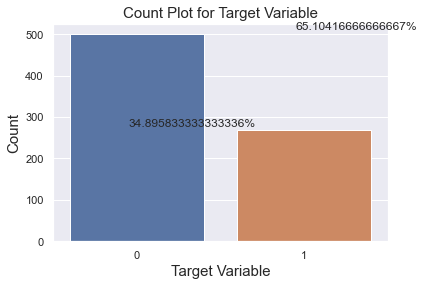

In [166]:
# plot the countplot of the variable 'target'
sns.countplot(x = df_target.Outcome)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = 0.95, y = df_target.Outcome.value_counts()[0] + 10, s = str((class_frequency[0])*100/len(df_target.Outcome)) + '%')
plt.text(x = -0.05, y = df_target.Outcome.value_counts()[1] +10, s = str((class_frequency[1])*100/len(df_target.Outcome)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

<a id='correlation'></a>
## **3.1.4 Correlation**

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near  1  indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

To check the correlation between numerical variables, we perform the following steps:<br><br>
                    1. Compute a correlation matrix  <br>
                    2. Plot a heatmap for the correlation matrix
                    

**1. Compute a correlation matrix**

In [167]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = df_features.corr()

# print the correlation matrix
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


**2. Plot the heatmap for the diagonal correlation matrix**

A correlation matrix is a symmetric matrix. Plot only the lower triangular entries using a heatmap.

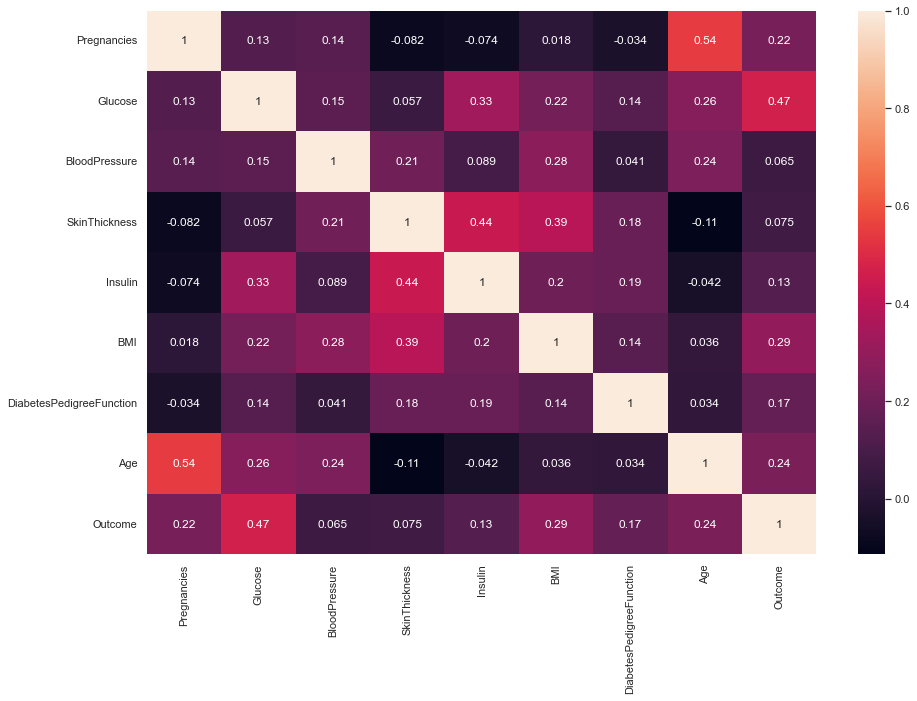

In [168]:
# Heat Map

plt.figure(figsize=(15,10))
sns.heatmap(raw_data.corr(), annot=True);

Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.

<a id='outliers'></a>
## **3.1.5 Discover Outliers**

Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

To detect outliers in numeric data, we plot the boxplot for the data

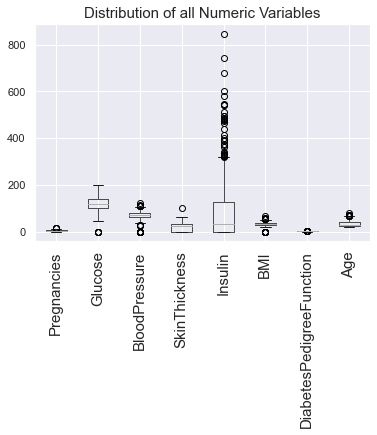

In [169]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

<a id='Missing_Values'></a>
## **3.1.6 Missing Values**

In [170]:
# checking for missing values again

raw_data.isna().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<a id='Duplicate Values'></a>
## **3.1.7 Duplicate Values**

In [171]:
raw_data.shape

(768, 9)

In [172]:
raw_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [173]:
raw_data=raw_data.drop_duplicates()

In [174]:
raw_data.shape

(768, 9)

In [175]:
df_features = raw_data.iloc[:, raw_data.columns != 'Outcome']

In [176]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


<a id='Visualization'></a>
## **3.2 Visualization**

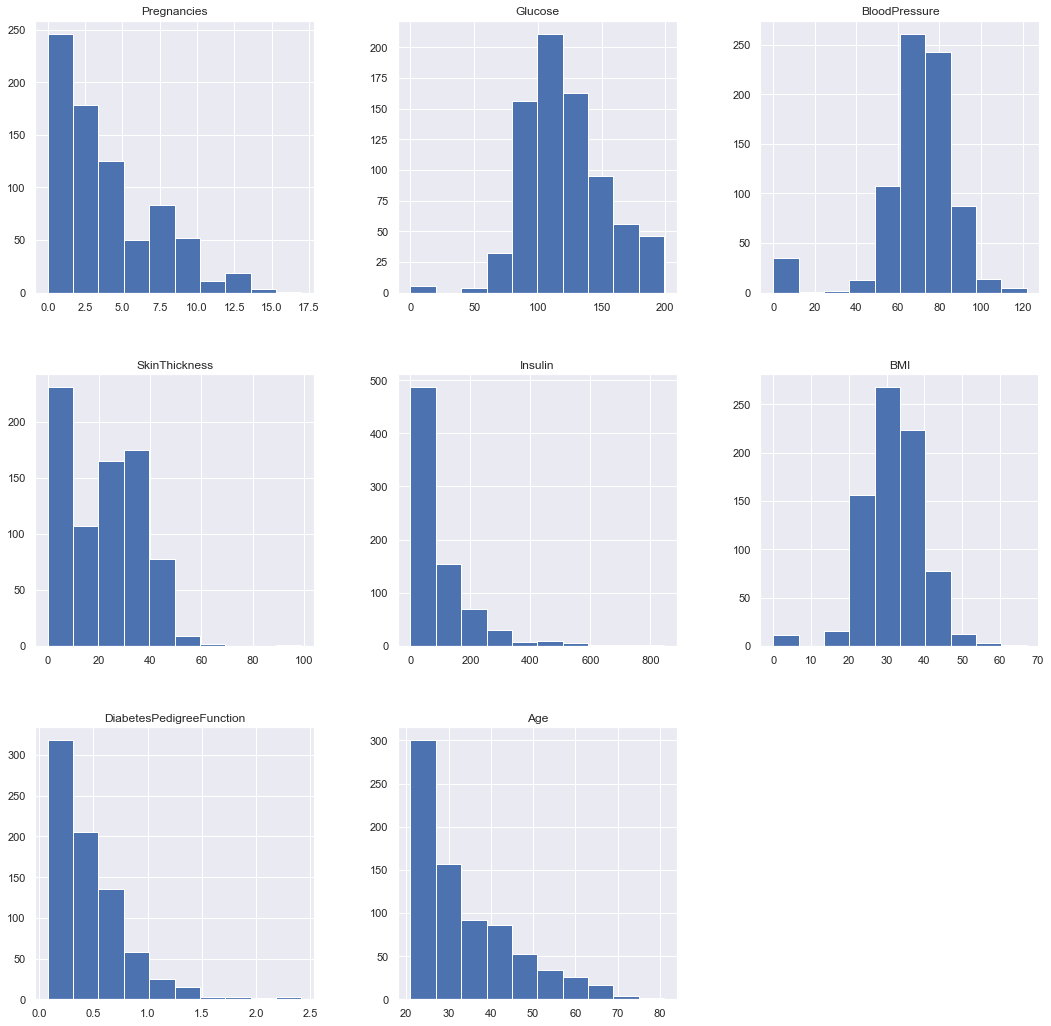

In [177]:
# Histogram

fig = df_features.hist(figsize = (18,18))
col=categorical
plt.show()
for i in col:
  plt.figure(figsize=(5,4))
  print(i)
  plt.hist(df_features[i])
  plt.show()



Pregnancies


<Figure size 3600x360 with 0 Axes>

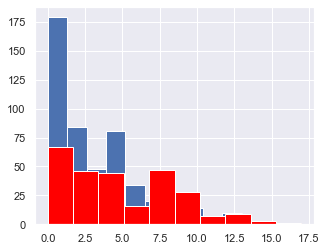

Glucose


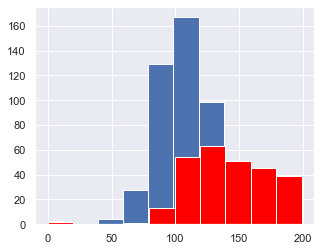

BloodPressure


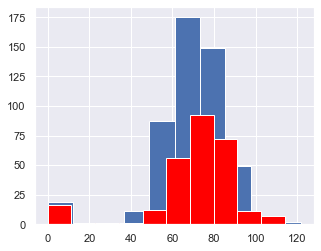

SkinThickness


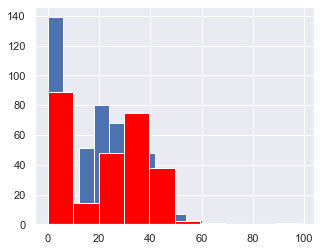

Insulin


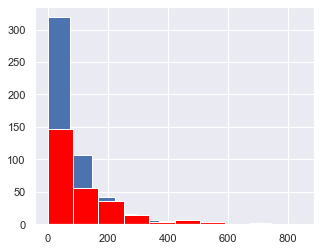

BMI


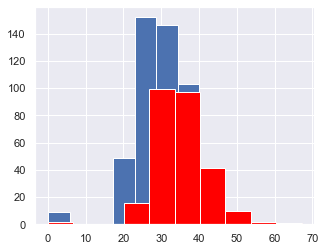

DiabetesPedigreeFunction


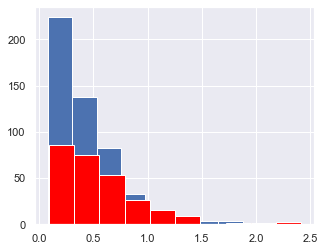

Age


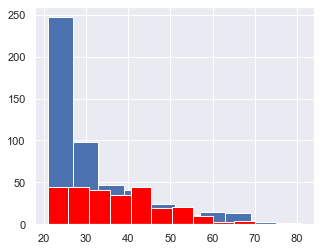

In [178]:
# Histogram
fig = plt.figure(figsize = (50, 5))

col=df_features.columns
l1=[]
l2=[]
for i in col:
  for j in range(0,768):
    if df_target.Outcome[j]==0:
      l1.append(df_features[i][j])
    else:
      l2.append(df_features[i][j])
  plt.figure(figsize=(5,4))
  print(i)
  plt.hist(l1)
  plt.hist(l2,color='Red')
  plt.show()
  l1=[]
  l2=[]

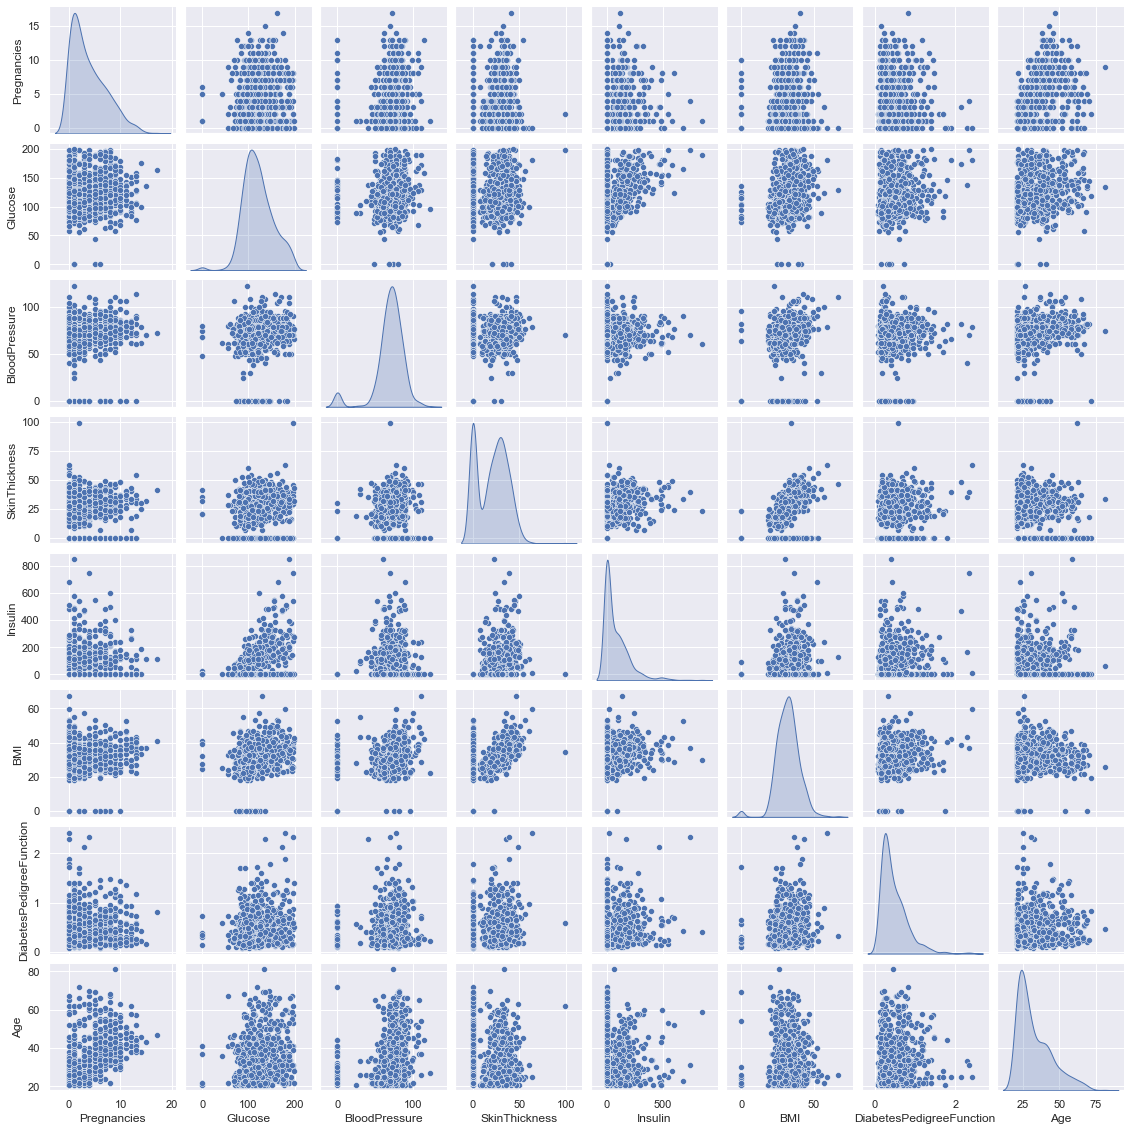

In [179]:
col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']


sns.pairplot(df_features[col],size=2,kind='scatter',diag_kind='kde')
plt.show()

<a id="Balancing of Data"> </a>
## **3.3 Balancing of Data**

In [180]:
raw_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [181]:
# splitting features and the target variable
# consider all the columns except 'target' using 'iloc'
# here id is not required for analysis
df_features = raw_data.iloc[:, raw_data.columns != 'Outcome']

# consider the target variable
df_target = raw_data.iloc[:,raw_data.columns == 'Outcome']

In [182]:
# get counts of 0's and 1's in the 'target' variable using 'value_counts()'
# store the values in 'class_frequency'
class_frequency = df_target.Outcome.value_counts()
class_frequency

0    500
1    268
Name: Outcome, dtype: int64

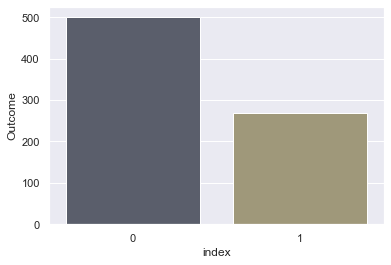

In [183]:
xx = df_target['Outcome'].value_counts().reset_index()
sns.barplot(x = "index", y = "Outcome", data=xx, palette = "cividis");

SMOTE (Synthetic Minority Oversampling Technique) for balancing data

In [184]:
col_names = list(df_features.columns)


X = df_features[col_names]
y = raw_data['Outcome']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


raw_data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
raw_data.columns = col_names + ['Outcome']
raw_data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,6,186,83,31,216,38.872963,0.716613,44,1
996,3,147,63,30,331,29.973817,0.209723,29,1
997,8,105,65,0,0,32.317600,0.249134,39,1
998,8,111,64,0,0,29.122464,0.573533,36,1


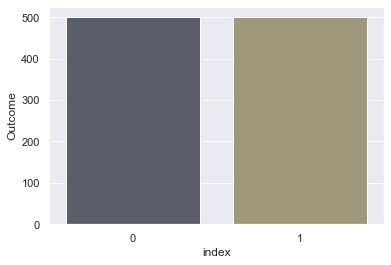

In [185]:
xx = raw_data['Outcome'].value_counts().reset_index()
sns.barplot(x = "index", y = "Outcome", data=xx, palette = "cividis");

<a id="feature_selection"> </a>
## **4. Feature Selection**

In [186]:

# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)


In [187]:
#scaling

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [188]:
# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_table = pd.DataFrame(columns = cols)

## **4.1. KNN**

In [189]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [190]:
# compute the performance measures on test data
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))
# call the function 'get_test_report'
# pass the knn model to the function
test_report = get_test_report(knn_model)
test_pred = knn_model.predict(X_test)
# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       139
           1       0.77      0.84      0.80       161

    accuracy                           0.78       300
   macro avg       0.78      0.77      0.78       300
weighted avg       0.78      0.78      0.78       300



In [191]:

# compiling the required information
knn = pd.Series({'Model': "knn",
                     'AUC Score' : metrics.roc_auc_score(y_test, test_pred),
                 'Precision Score': metrics.precision_score(y_test, test_pred),
                 'Recall Score': metrics.recall_score(y_test, test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred),
                  'f1-score':metrics.f1_score(y_test, test_pred)})



# appending our result table
result_table = result_table.append(knn , ignore_index = True)

# view the result table
result_table

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,knn,0.774878,0.768362,0.84472,0.78,0.804734


## **4.2. KNN (GRID)**

In [192]:
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 1} 



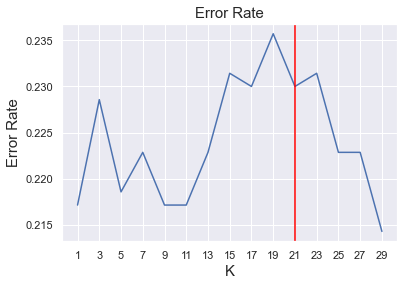

In [193]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,30,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'manhattan')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,30,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 30, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 21, color = 'red')

# display the plot
plt.show()

In [194]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the knn model using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(knn_grid))
test_pred = knn_grid.predict(X_test)

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.75      0.85      0.80       161

    accuracy                           0.77       300
   macro avg       0.77      0.76      0.77       300
weighted avg       0.77      0.77      0.77       300



In [195]:

# compiling the required information
knn = pd.Series({'Model': "knn(G)",
                     'AUC Score' : metrics.roc_auc_score(y_test, test_pred),
                 'Precision Score': metrics.precision_score(y_test, test_pred),
                 'Recall Score': metrics.recall_score(y_test, test_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, test_pred),
                  'f1-score':metrics.f1_score(y_test, test_pred)})



# appending our result table
# result_table = result_table.append(knn , ignore_index = True)

# view the result table
# result_table

## **4.3. Random Forest Classifier**

In [196]:

# Loading the dataset
df = pd.read_csv(r'C:\Users\BR\Desktop\final project\dataset.csv')
df=df.drop_duplicates()
# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

# Model Building

X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating Random Forest Model

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("RF Accuracy: ",accuracy_score(y_test, y_pred))
# Creating a pickle file for the classifier

RF Accuracy:  0.8116883116883117


In [197]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.71      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



In [198]:

# compiling the required information
Random_Forest_Classifier = pd.Series({'Model': "Random Forest Classifier",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_table = result_table.append(Random_Forest_Classifier , ignore_index = True)

# view the result table
result_table

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,knn,0.774878,0.768362,0.84472,0.78,0.804734
1,Random Forest Classifier,0.763074,0.714286,0.638298,0.811688,0.674157


In [199]:
a1=metrics.accuracy_score(y_test, y_pred)

## **4.4 Bagging meta-estimator(RF)**

Now we build a ensemble model using Bagging meta-estimator. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a  ensemble model using Bagging meta-estimator, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      

**1. Build the model and Predict the values**

In [200]:



# build the model

rf_bag_model = BaggingClassifier(RandomForestClassifier(random_state=10))

# fit the model
rf_bag_model.fit(X_train, y_train)
# predict the values
y_pred = rf_bag_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8311688311688312

**2. Compute accuracy measures**

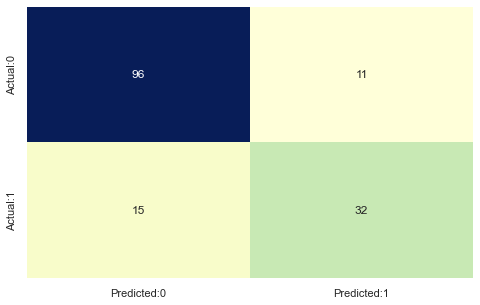

In [201]:

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [202]:

# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.68      0.71        47

    accuracy                           0.83       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154



**3. Tabulate the results**

In [203]:

# compiling the required information
Bagging_Meta_estimator = pd.Series({'Model': "Bagging Meta-estimator(RF)",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_table = result_table.append(Bagging_Meta_estimator , ignore_index = True)

# view the result table
result_table

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,knn,0.774878,0.768362,0.84472,0.78,0.804734
1,Random Forest Classifier,0.763074,0.714286,0.638298,0.811688,0.674157
2,Bagging Meta-estimator(RF),0.789024,0.744186,0.680851,0.831169,0.711111


It can be seen from the result tabulation, that all of the accuracy measures for both the models are very good.

<a id="model_cmp"> </a>
## **5. Model Comparision**

In [204]:
result_table

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,knn,0.774878,0.768362,0.84472,0.78,0.804734
1,Random Forest Classifier,0.763074,0.714286,0.638298,0.811688,0.674157
2,Bagging Meta-estimator(RF),0.789024,0.744186,0.680851,0.831169,0.711111


<a id="pickle"> </a>
## **6. Pickel File**

In [205]:
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(rf_bag_model, open(filename, 'wb'))